In [1]:
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [2]:
urlav = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Avalon.csv"
avalon = pd.read_csv(urlav)

# urlmor = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Morgan.csv"
# morgan = pd.read_csv(urlmor)

# urlmac = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/maccs.csv"
# maccs = pd.read_csv(urlmac)

In [3]:
avalon.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp502,fp503,fp504,fp505,fp506,fp507,fp508,fp509,fp510,fp511
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,-1.33,c1ccsc1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [4]:
avalon.shape

(1128, 515)

In [5]:
avalon_fps = avalon.iloc[:,3:515].values

avalon_logps = avalon.iloc[:,1].values

avalon_logps_fps = avalon.drop(['index', 'smiles'], axis=1)

In [6]:
avalon_fps.shape

(1128, 512)

In [7]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig

In [8]:
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [9]:
import numpy as np

avalon['Donor'] = np.zeros(avalon.shape[0], dtype=int)
avalon['Acceptor'] = np.zeros(avalon.shape[0], dtype=int)
avalon['Aromatic'] = np.zeros(avalon.shape[0], dtype=int)
avalon['Hydrophobe'] = np.zeros(avalon.shape[0], dtype=int)
avalon['LumpedHydrophobe'] = np.zeros(avalon.shape[0], dtype=int)

In [10]:
for i in range(avalon.shape[0]):
    m = Chem.MolFromSmiles(avalon['smiles'][i])
    feats = factory.GetFeaturesForMol(m)
    if feats:
        for j in range(len(feats)):
            if feats[j].GetFamily() == 'Donor':
                avalon.loc[i, 'Donor'] += 1
            elif feats[j].GetFamily() == 'Acceptor':
                avalon.loc[i, 'Acceptor'] += 1
            elif feats[j].GetFamily() == 'Aromatic':
                avalon.loc[i, 'Aromatic'] += 1
            elif feats[j].GetFamily() == 'Hydrophobe':
                avalon.loc[i, 'Hydrophobe'] += 1
            elif feats[j].GetFamily() == 'LumpedHydrophobe':
                avalon.loc[i, 'LumpedHydrophobe'] += 1
                
avalon.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp507,fp508,fp509,fp510,fp511,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,1,0,0,...,0,0,0,0,0,7,11,1,1,1
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,2,1,1
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,6,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,8,5
4,4,-1.33,c1ccsc1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [12]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard

res = 1 - pdist(avalon_fps, 'jaccard')
squareform(res)
avalon_distance = pd.DataFrame(squareform(res), index=avalon.index, columns= avalon.index)

avalon_distance

,0,1,2,3,4,5,6,7,8,9,...,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
0,0.000000,0.204301,0.031915,0.172043,0.115702,0.174603,0.158879,0.252525,0.186916,0.221774,...,0.095745,0.011494,0.145299,0.172414,0.148148,0.073394,0.098765,0.131579,0.011905,0.153409
1,0.204301,0.000000,0.079470,0.093750,0.288462,0.263158,0.124260,0.250996,0.266289,0.276817,...,0.049689,0.019868,0.129944,0.120000,0.165644,0.051724,0.207921,0.096774,0.013423,0.154506
2,0.031915,0.079470,0.000000,0.021277,0.057143,0.038710,0.032787,0.056497,0.032258,0.056769,...,0.105263,0.080000,0.028169,0.051282,0.086207,0.018182,0.035398,0.037383,0.142857,0.036496
3,0.172043,0.093750,0.021277,0.000000,0.075000,0.130719,0.229508,0.137143,0.084967,0.109170,...,0.000000,0.000000,0.197183,0.232558,0.136364,0.014925,0.032000,0.069565,0.000000,0.084507
4,0.115702,0.288462,0.057143,0.075000,0.000000,0.213415,0.074468,0.108374,0.088146,0.133603,...,0.025641,0.015625,0.077670,0.097222,0.086022,0.032967,0.123188,0.056738,0.016393,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.073394,0.051724,0.018182,0.014925,0.032967,0.040230,0.077922,0.067010,0.100324,0.087137,...,0.050847,0.021739,0.068966,0.033898,0.050633,0.000000,0.087302,0.091667,0.023256,0.058824
1124,0.098765,0.207921,0.035398,0.032000,0.123188,0.203980,0.066667,0.135593,0.162319,0.166065,...,0.108108,0.048544,0.069444,0.060870,0.082707,0.087302,0.000000,0.136095,0.039604,0.155440
1125,0.131579,0.096774,0.037383,0.069565,0.056738,0.097674,0.053435,0.124464,0.172107,0.174074,...,0.073394,0.051546,0.057143,0.035714,0.053435,0.091667,0.136095,0.000000,0.042105,0.205556
1126,0.011905,0.013423,0.142857,0.000000,0.016393,0.013605,0.020000,0.023392,0.013158,0.022222,...,0.153846,0.500000,0.016667,0.035714,0.040816,0.023256,0.039604,0.042105,0.000000,0.023622


In [13]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=30, linkage='complete').fit(avalon_distance)
print(model.labels_)

[25 10  5 ... 24 27 18]


In [14]:
avalon['Agglomerative'] = model.labels_
avalon

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp508,fp509,fp510,fp511,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe,Agglomerative
0,0,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,1,0,0,...,0,0,0,0,7,11,1,1,1,25
1,1,-3.300,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,1,0,...,0,0,0,0,1,1,2,1,1,10
2,2,-2.060,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,6,0,5
3,3,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,8,5,8
4,4,-1.330,c1ccsc1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,-1.710,FC(F)(F)C(Cl)Br,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,24
1124,1124,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,0,0,0,0,0,0,0,...,0,0,1,0,2,3,0,0,0,24
1125,1125,-3.091,CCSCCSP(=S)(OC)OC,1,1,1,1,0,0,0,...,0,0,0,0,0,2,0,3,0,24
1126,1126,-3.180,CCC(C)C,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,27


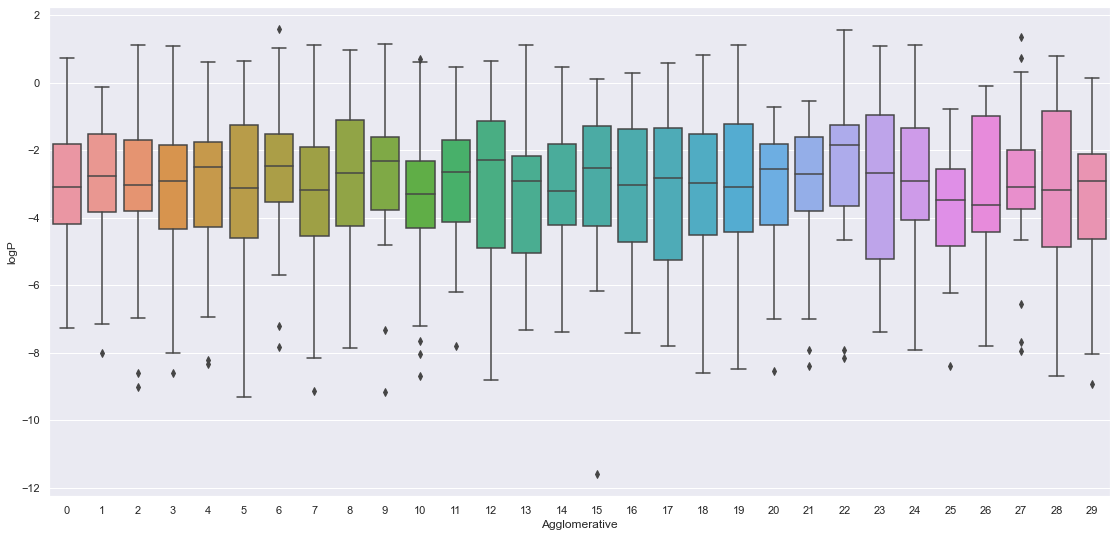

In [17]:
import seaborn as sns

sns.boxplot(x=avalon['Agglomerative'], y=avalon['logP'], data=avalon)
sns.set(rc={'figure.figsize':(19,9)})

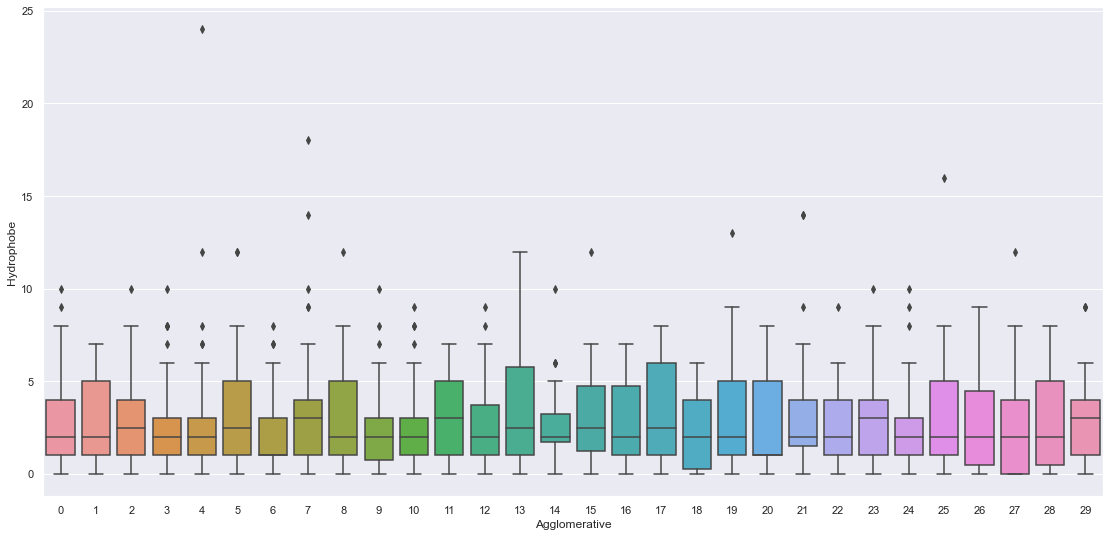

In [18]:
sns.boxplot(x=avalon['Agglomerative'], y=avalon['Hydrophobe'], data=avalon)
sns.set(rc={'figure.figsize':(19,9)})

In [19]:
from sklearn.neighbors import NearestNeighbors

neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(avalon_fps) 
distances, indices = nbrs.kneighbors(avalon_fps)

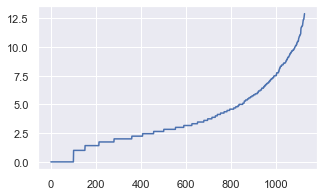

In [20]:
import matplotlib.pyplot as plt
import numpy as np

distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances) 
plt.show() 

In [37]:
from sklearn.cluster import DBSCAN

avalon_fps = avalon.iloc[:,3:515].values
dbscan = DBSCAN(eps=0.3, min_samples=2, algorithm='auto', metric='jaccard').fit(avalon_fps)

labels = dbscan.labels_ 
labels[6:600]

array([  3,   4,   5,  -1,   6,   7,   8,   9,  10,  -1,  11,  12,  -1,
        11,   3,  -1,  13,  14,  -1,  11,  15,   9,  -1,  16,  17,  13,
        -1,  -1,  18,  19,  -1,  -1,  -1,  20,   3,  -1,   9,  -1,  21,
        11,  14,  22,  -1,  -1,  23,   9,   1,  -1,   3,  24,  -1,   1,
         1,  25,   3,  16,  26,  27,  -1,  -1,  28,  -1,  -1,   3,  -1,
        -1,  29,   9,  16,  -1,  30,   3,  -1,  -1,  31,  32,  -1,  17,
        17,  33,  -1,  -1,  -1,  34,  35,   9,  36,  37,   1,  38,  -1,
         3,  -1,  17,  26,  -1,  39,  -1,   1,  -1,  40,  41,  -1,  42,
        -1,  -1,  -1,  24,  43,  15,  44,  -1,  17,   3,  -1,  45,   3,
        35,   8,  -1,  -1,  46,  -1,  47,  48,  26,  -1,  -1,  49,  -1,
        -1,   9,  50,  51,   8,  52,  -1,  43,  17,  53,  -1,   9,  -1,
        41,  42,  24,  11,  54,   8,  16,  -1,  -1,  55,   3,  -1,  -1,
        19,  56,  57,  -1,   3,  30,  58,  59,   3,  -1,  26,  -1,  -1,
        30,  -1,   9,  60,   9,  45,  -1,  -1,  -1,  55,  26,  -

In [23]:
from sklearn.manifold import TSNE

avalon_m = TSNE(learning_rate=50, perplexity=8)
avalon_tsne_fts = avalon_m.fit_transform(avalon_fps)
avalon_tsne_fts

array([[-73.24142  ,   1.9438721],
       [ 28.830729 ,  13.515937 ],
       [  9.441279 ,  44.775944 ],
       ...,
       [-34.08539  , -14.616958 ],
       [-23.673264 ,  35.85443  ],
       [-30.00612  , -31.447578 ]], dtype=float32)

In [24]:
avalon_tsne_fts_df = pd.DataFrame(avalon_tsne_fts, columns=['x', 'y'])
avalon_tsne_fts_df['logP'] = avalon_logps
avalon_tsne_fts_df

,x,y,logP
0,-73.241417,1.943872,-0.770
1,28.830729,13.515937,-3.300
2,9.441279,44.775944,-2.060
3,48.501652,-35.588364,-7.870
4,26.253447,13.962746,-1.330
...,...,...,...
1123,-29.419495,56.039516,-1.710
1124,-22.496706,-1.130950,0.106
1125,-34.085388,-14.616958,-3.091
1126,-23.673264,35.854431,-3.180


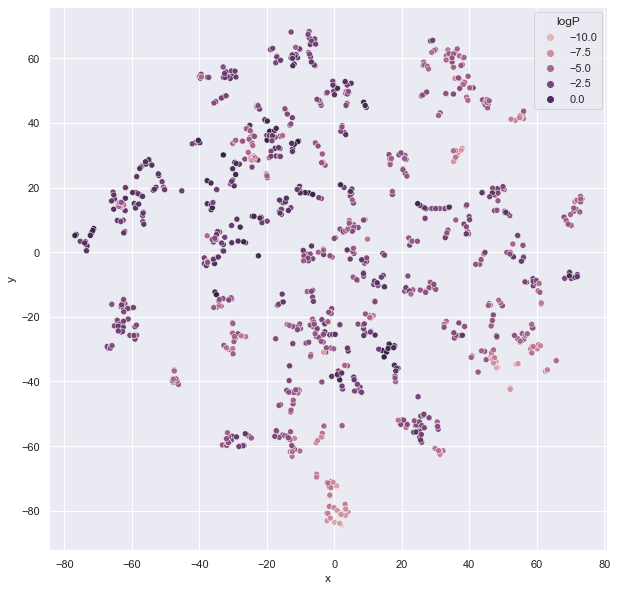

In [33]:
import seaborn as sns
from matplotlib import colors

sns.scatterplot(x='x', y='y', hue='logP', data=avalon_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [26]:
avalon_tsne_fts_df['Donor'] = avalon['Donor'].values
avalon_tsne_fts_df['Acceptor'] = avalon['Acceptor'].values
avalon_tsne_fts_df['Aromatic'] = avalon['Aromatic'].values
avalon_tsne_fts_df['Hydrophobe'] = avalon['Hydrophobe'].values
avalon_tsne_fts_df['LumpedHydrophobe'] = avalon['LumpedHydrophobe'].values
avalon_tsne_fts_df

,x,y,logP,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,-73.241417,1.943872,-0.770,7,11,1,1,1
1,28.830729,13.515937,-3.300,1,1,2,1,1
2,9.441279,44.775944,-2.060,0,1,0,6,0
3,48.501652,-35.588364,-7.870,0,0,5,8,5
4,26.253447,13.962746,-1.330,0,0,1,0,1
...,...,...,...,...,...,...,...,...
1123,-29.419495,56.039516,-1.710,0,0,0,1,0
1124,-22.496706,-1.130950,0.106,2,3,0,0,0
1125,-34.085388,-14.616958,-3.091,0,2,0,3,0
1126,-23.673264,35.854431,-3.180,0,0,0,2,1


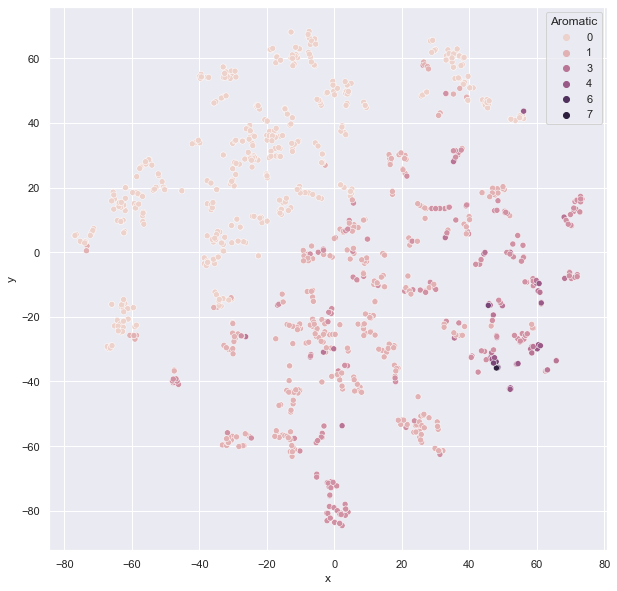

In [27]:
sns.scatterplot(x='x', y='y', hue='Aromatic', data=avalon_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

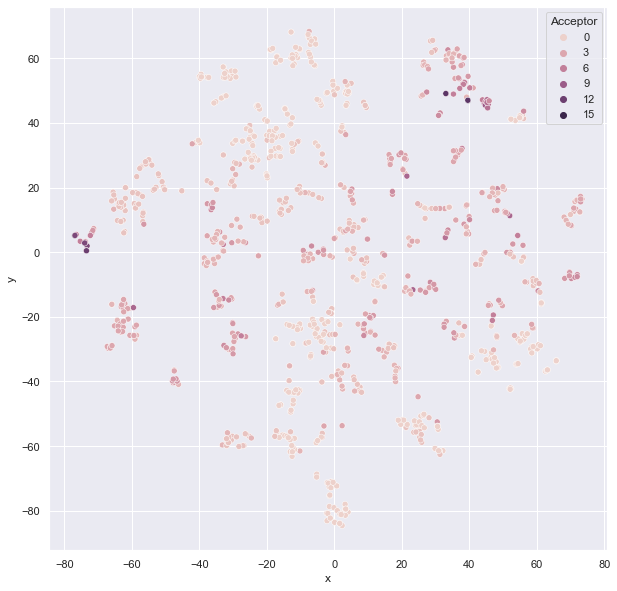

In [28]:
sns.scatterplot(x='x', y='y', hue='Acceptor', data=avalon_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

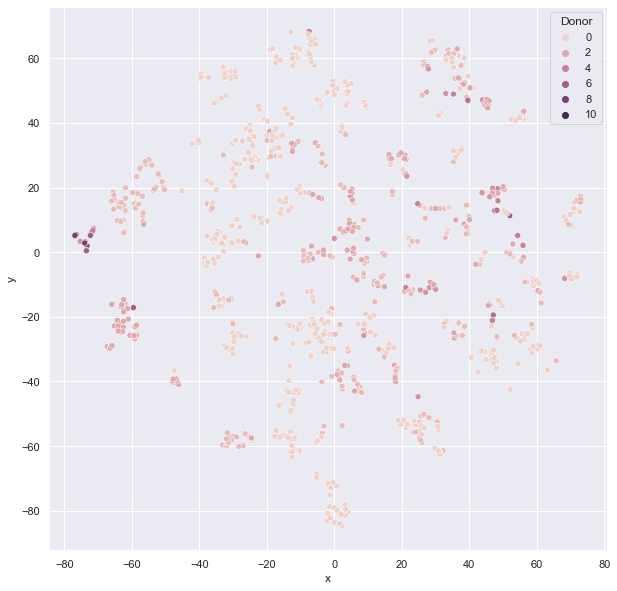

In [29]:
sns.scatterplot(x='x', y='y', hue='Donor', data=avalon_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

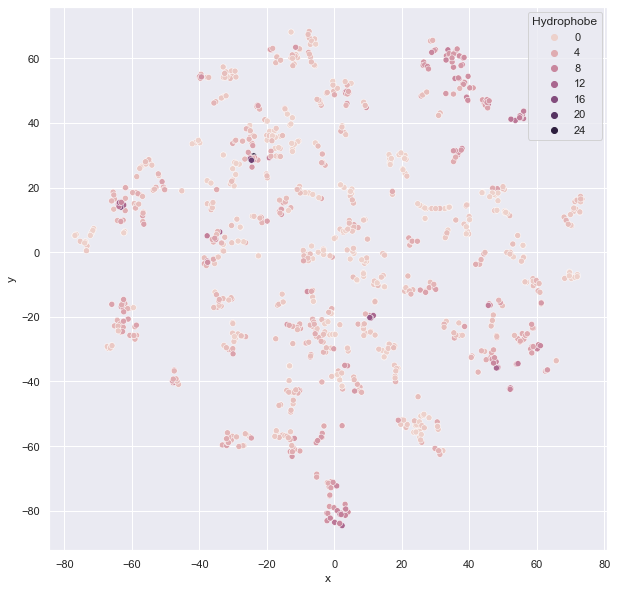

In [30]:
sns.scatterplot(x='x', y='y', hue='Hydrophobe', data=avalon_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [38]:
avalon_tsne_DB_df = pd.DataFrame(avalon_tsne_fts, columns=['x', 'y'])
avalon_tsne_DB_df['num'] = dbscan.labels_
avalon_tsne_DB_df

,x,y,num
0,-73.241417,1.943872,-1
1,28.830729,13.515937,-1
2,9.441279,44.775944,0
3,48.501652,-35.588364,1
4,26.253447,13.962746,-1
...,...,...,...
1123,-29.419495,56.039516,-1
1124,-22.496706,-1.130950,-1
1125,-34.085388,-14.616958,13
1126,-23.673264,35.854431,45


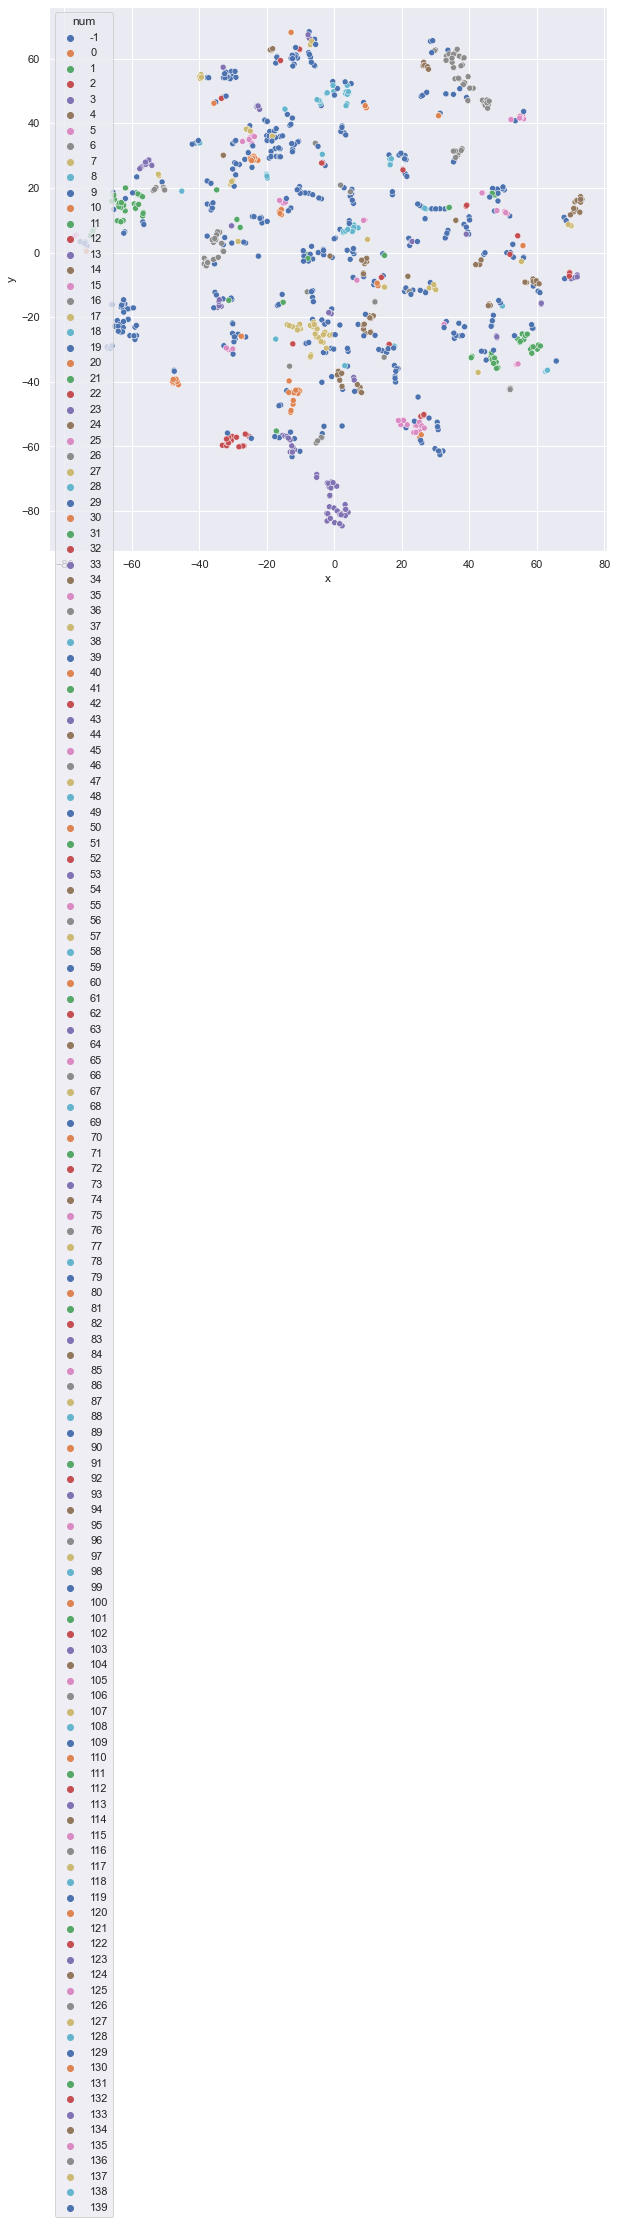

In [39]:
sns.scatterplot(x='x', y='y', hue='num', data=avalon_tsne_DB_df, palette="deep")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [40]:
clustering = AgglomerativeClustering(n_clusters=9, linkage="ward").fit(avalon_tsne_fts)

avalon_tsne_AGG_df = pd.DataFrame(avalon_tsne_fts, columns=['x', 'y'])
avalon_tsne_AGG_df['num'] = clustering.labels_
avalon_tsne_AGG_df

,x,y,num
0,-73.241417,1.943872,7
1,28.830729,13.515937,0
2,9.441279,44.775944,1
3,48.501652,-35.588364,5
4,26.253447,13.962746,0
...,...,...,...
1123,-29.419495,56.039516,1
1124,-22.496706,-1.130950,2
1125,-34.085388,-14.616958,2
1126,-23.673264,35.854431,1


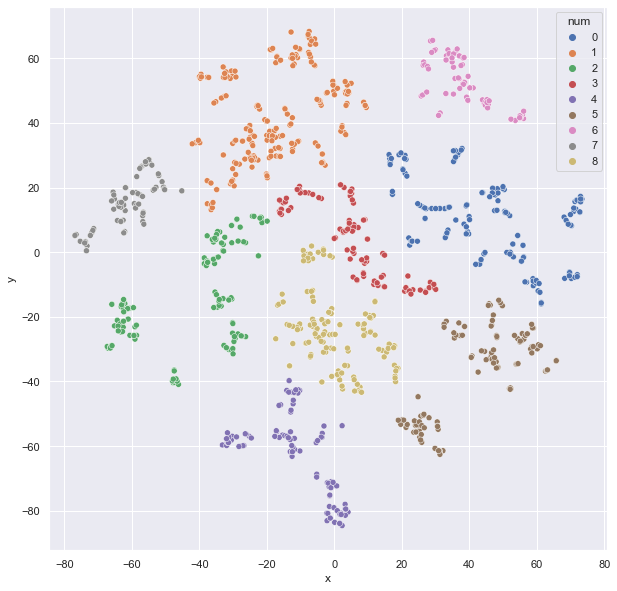

In [41]:
sns.scatterplot(x='x', y='y', hue='num', data=avalon_tsne_AGG_df, palette="deep")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()